# Loss Function
발표자 : 통합과정 최찬혁

이 코드에서는 classification에서 자주 쓰이는 loss function인 cross-entropy loss 및 sparse-cross-entropy loss의 차이를 tensorflow 환경에서 알아보고자 합니다.

이 코드는 MNIST Dataset에 대해 cross-entropy loss 및 sparse-cross-entropy loss를 이용한 모델을 학습시키는 코드입니다.

## Import pakage
필요한 패키지를 불러옵니다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

## Download data and split into train_set/validation_set/test_set

MNIST 데이터를 다운로드받아서 이를 train_set/validation_set/test_set으로 분리합니다.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

현재 다운로드 받은 데이터의 형태는 다음과 같습니다.

In [3]:
print("x_train : ", x_train.shape, type(x_train), x_train.dtype)
print("y_train : ", y_train.shape, type(y_train), y_train.dtype)
print("x_test : ", x_test.shape, type(x_test), x_test.dtype)
print("y_test : ", y_test.shape, type(y_test), y_test.dtype)

x_train :  (60000, 28, 28) <class 'numpy.ndarray'> uint8
y_train :  (60000,) <class 'numpy.ndarray'> uint8
x_test :  (10000, 28, 28) <class 'numpy.ndarray'> uint8
y_test :  (10000,) <class 'numpy.ndarray'> uint8


train_set이 60000개, test_set이 10000개 있는데 train_set 60000개 중 10000개를 validation_set으로 쓰고자 합니다.

In [4]:
x_train, x_valid = x_train[:50000], x_train[50000:]
y_train, y_valid = y_train[:50000], y_train[50000:]

## Preprocess data

In [5]:
print("x_example : \n",x_train[0])
print("y_example", y_train[0])

x_example : 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 

input(x)은 $\left\{ 0, 1, \cdots , 255 \right\}^{28 \times 28}$, label(y)은 $\left\{ 0, 1, \cdots , 9 \right\}$ 형태로 되어 있습니다.

input(x)의 경우 $0$, $1$ 사이로 맞추기 위해 $255$로 나누어주고, 단순한 MLP이므로 $28\times 28$(2D) 형태가 아닌 $784$(1D) 형태로 바꿔주어야 됩니다.

또한, label(y)의 경우 정수가 아닌 one-hot encoding이 필요합니다.

In [6]:
x_train = x_train.reshape(50000,28*28)/255
x_valid = x_valid.reshape(-1, 28*28)/255
x_test  = x_test.reshape(-1, 28*28)/255

y_train_one_hot = np.eye(10)[y_train]
y_valid_one_hot = np.eye(10)[y_valid]

np.eye($N$)은 $N \times N$ 단위행렬을 나타냅니다. 이 때 $k$index 위치의 경우 $k$번째 원소는 $1$이고 나머지 원소는 $0$인 벡터를 얻을 수 있습니다.

## Set hyperparameters

In [7]:
MAX_EPOCHS = 100

## Categorical cross entropy loss
Categorical cross entropy loss는 label(y)이 one-hot encoding된 벡터여야만 됩니다. 만약 label(y)이 one-hot encoding된 벡터가 아닌 일반적인 정수형태인 경우 에러 메세지가 출력됩니다.

In [8]:
input_tensor0 = Input(28*28)
x0 = Dense(100, activation='sigmoid', kernel_initializer='glorot_normal')(input_tensor0)
x0 = Dense(10, activation='softmax')(x0)

model0 = Model(inputs=input_tensor0, outputs=x0)
optim = tf.keras.optimizers.SGD(learning_rate=0.01)
model0.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=optim, metrics=['accuracy'])

In [9]:
history0 = model0.fit(x_train, y_train, batch_size=250, epochs=MAX_EPOCHS, validation_data=(x_valid, y_valid))

Epoch 1/100


ValueError: in user code:

    File "c:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\user\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\user\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\user\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\user\anaconda3\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\user\anaconda3\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (250, 1) and (250, 10) are incompatible


In [10]:
input_tensor = Input(28*28)
x = Dense(100, activation='sigmoid', kernel_initializer='glorot_normal')(input_tensor)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=x)
optim = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=optim, metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train_one_hot, batch_size=250, epochs=MAX_EPOCHS, validation_data=(x_valid, y_valid_one_hot))

Epoch 1/100
200/200 [==============================] - 2s 9ms/step - loss: 2.2012 - accuracy: 0.3195 - val_loss: 2.0728 - val_accuracy: 0.5368
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 1.9769 - accuracy: 0.6050 - val_loss: 1.8647 - val_accuracy: 0.6871
Epoch 3/100
200/200 [==============================] - 1s 6ms/step - loss: 1.7804 - accuracy: 0.6803 - val_loss: 1.6683 - val_accuracy: 0.7411
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 1.5973 - accuracy: 0.7194 - val_loss: 1.4879 - val_accuracy: 0.7634
Epoch 5/100
200/200 [==============================] - 1s 7ms/step - loss: 1.4325 - accuracy: 0.7432 - val_loss: 1.3286 - val_accuracy: 0.7910
Epoch 6/100
200/200 [==============================] - 2s 8ms/step - loss: 1.2898 - accuracy: 0.7674 - val_loss: 1.1930 - val_accuracy: 0.8066
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 1.1695 - accuracy: 0.7843 - val_loss: 1.0799 - val_accuracy: 0.8183

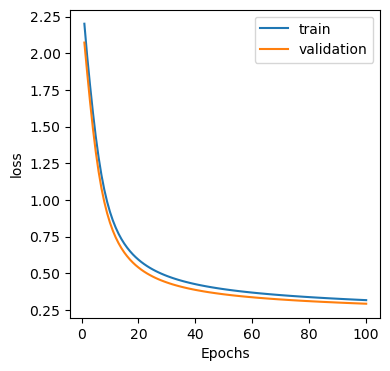

In [12]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(1, MAX_EPOCHS+1), history.history['loss'], label='train')
plt.plot(np.arange(1, MAX_EPOCHS+1), history.history['val_loss'], label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

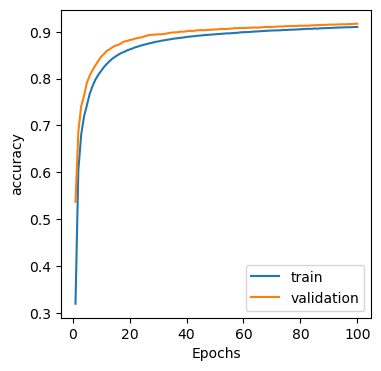

In [13]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(1, MAX_EPOCHS+1), history.history['accuracy'], label='train')
plt.plot(np.arange(1, MAX_EPOCHS+1), history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

In [14]:
pred = model.predict(x_test)
pred_label = np.argmax(pred, axis = 1)
test_acc = np.sum(pred_label==y_test)/y_test.shape[0]
print('Test Accuracy:', test_acc*100, '%')

313/313 [==============================] - 1s 3ms/step
Test Accuracy: 91.62 %


## Sparse categorical cross entropy loss

one-hot encoding이 되지 않은 원래의 정수형 label을 그대로 쓰고 싶다면 sparse categorical cross entropy loss를 이용하면 됩니다. 다만 이 경우에 label(y)이 one-hot encoding된 벡터인 경우 에러메세지가 출력됩니다.

In [15]:
input_tensor0 = Input(28*28)
x0 = Dense(100, activation='sigmoid', kernel_initializer='glorot_normal')(input_tensor0)
x0 = Dense(10, activation='softmax')(x0)

model0 = Model(inputs=input_tensor0, outputs=x0)
optim = tf.keras.optimizers.SGD(learning_rate=0.01)
model0.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=optim, metrics=['accuracy'])

In [16]:
history0 = model0.fit(x_train, y_train_one_hot, batch_size=250, epochs=MAX_EPOCHS, validation_data=(x_valid, y_valid_one_hot))

Epoch 1/100


ValueError: in user code:

    File "c:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\user\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\user\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\user\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\user\anaconda3\lib\site-packages\keras\losses.py", line 2098, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "c:\Users\user\anaconda3\lib\site-packages\keras\backend.py", line 5633, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(2500,) and logits.shape=(250, 10)


In [17]:
input_tensor2 = Input(28*28)
x2 = Dense(100, activation='sigmoid', kernel_initializer='glorot_normal')(input_tensor2)
x2 = Dense(10, activation='softmax')(x2)

model2 = Model(inputs=input_tensor2, outputs=x2)
optim = tf.keras.optimizers.SGD(learning_rate=0.01)
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=optim, metrics=['accuracy'])

In [18]:
history2 = model2.fit(x_train, y_train, batch_size=250, epochs=MAX_EPOCHS, validation_data=(x_valid, y_valid))

Epoch 1/100
200/200 [==============================] - 2s 7ms/step - loss: 2.2116 - accuracy: 0.3262 - val_loss: 2.0615 - val_accuracy: 0.5556
Epoch 2/100
200/200 [==============================] - 1s 6ms/step - loss: 1.9545 - accuracy: 0.6163 - val_loss: 1.8376 - val_accuracy: 0.6984
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 1.7456 - accuracy: 0.7011 - val_loss: 1.6325 - val_accuracy: 0.7466
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 1.5568 - accuracy: 0.7387 - val_loss: 1.4492 - val_accuracy: 0.7793
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 1.3916 - accuracy: 0.7647 - val_loss: 1.2918 - val_accuracy: 0.8057
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 1.2514 - accuracy: 0.7866 - val_loss: 1.1597 - val_accuracy: 0.8177
Epoch 7/100
200/200 [==============================] - 1s 6ms/step - loss: 1.1348 - accuracy: 0.7985 - val_loss: 1.0500 - val_accuracy: 0.8340

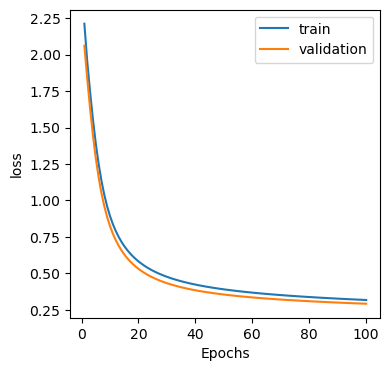

In [19]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(1, MAX_EPOCHS+1), history2.history['loss'], label='train')
plt.plot(np.arange(1, MAX_EPOCHS+1), history2.history['val_loss'], label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

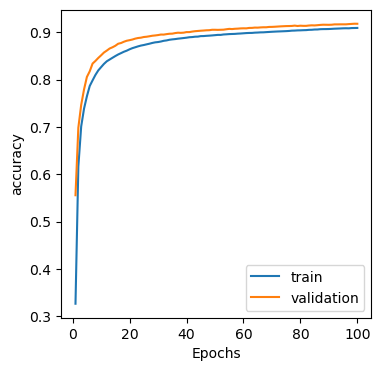

In [20]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(1, MAX_EPOCHS+1), history2.history['accuracy'], label='train')
plt.plot(np.arange(1, MAX_EPOCHS+1), history2.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

In [21]:
pred2 = model2.predict(x_test)
pred_label2 = np.argmax(pred2, axis = 1)
test_acc2 = np.sum(pred_label2==y_test)/y_test.shape[0]
print('Test Accuracy:', test_acc2*100, '%')

313/313 [==============================] - 1s 3ms/step
Test Accuracy: 91.45 %
